# **Task 3: Exploratory Data Analysis - Retail**
Problem Statement: Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’ This task is about Exploratory Data Analysis - Retail where the task focuses on a business manager who will try to find out weak areas where he can work to make more profit.

# **Importing Libraries**

In [28]:
import pandas as pd
from google.colab import files
from sklearn.datasets import load_files
import seaborn as sns
data=files.upload()
import io
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

Saving SampleSuperstore.csv to SampleSuperstore (1).csv


In [18]:
dataset=pd.read_csv(io.StringIO(data['SampleSuperstore.csv'].decode('utf-8')))

In [19]:
dataset.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [20]:
dataset.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [21]:
dataset.info

<bound method DataFrame.info of            Ship Mode    Segment        Country             City       State  \
0       Second Class   Consumer  United States        Henderson    Kentucky   
1       Second Class   Consumer  United States        Henderson    Kentucky   
2       Second Class  Corporate  United States      Los Angeles  California   
3     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
4     Standard Class   Consumer  United States  Fort Lauderdale     Florida   
...              ...        ...            ...              ...         ...   
9989    Second Class   Consumer  United States            Miami     Florida   
9990  Standard Class   Consumer  United States       Costa Mesa  California   
9991  Standard Class   Consumer  United States       Costa Mesa  California   
9992  Standard Class   Consumer  United States       Costa Mesa  California   
9993    Second Class   Consumer  United States      Westminster  California   

      Postal Code R

In [23]:
dataset.shape

(9994, 13)

# **Hence we conclude that there is no missing data.**

In [25]:
dataset.Sales.describe

<bound method NDFrame.describe of 0       261.9600
1       731.9400
2        14.6200
3       957.5775
4        22.3680
          ...   
9989     25.2480
9990     91.9600
9991    258.5760
9992     29.6000
9993    243.1600
Name: Sales, Length: 9994, dtype: float64>

In [26]:
dataset.Profit.describe

<bound method NDFrame.describe of 0        41.9136
1       219.5820
2         6.8714
3      -383.0310
4         2.5164
          ...   
9989      4.1028
9990     15.6332
9991     19.3932
9992     13.3200
9993     72.9480
Name: Profit, Length: 9994, dtype: float64>

In [27]:
dataset['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [41]:
dataset['Segment'].value_counts()  

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [42]:
dataset = dataset.drop(['Postal Code'],axis = 1) 

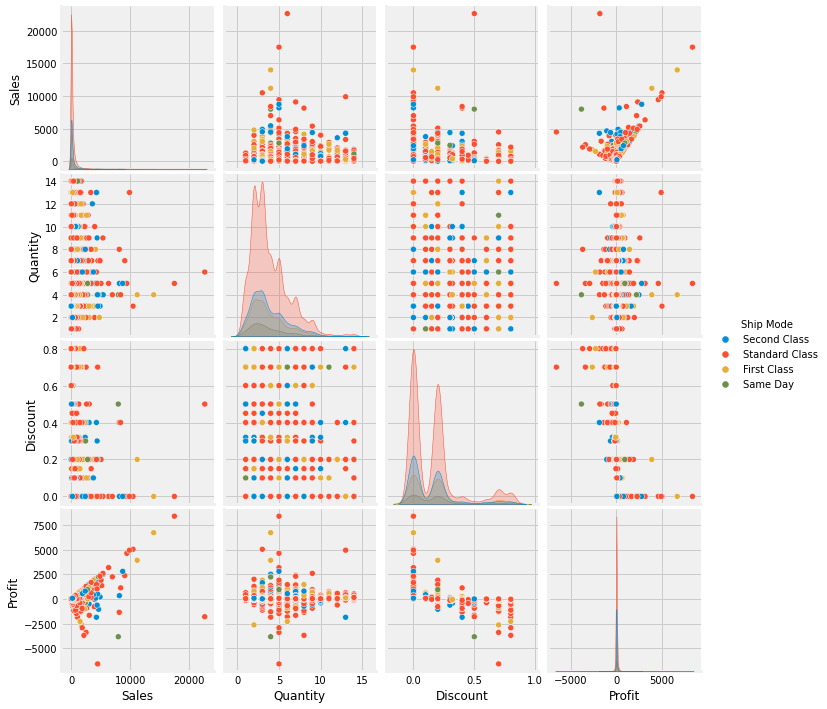

In [43]:
sns.pairplot(dataset, hue = 'Ship Mode')

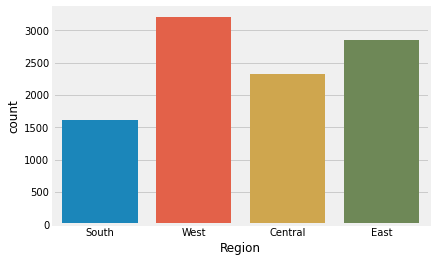

In [33]:
sns.countplot('Region',data=dataset)
plt.show()

## observation : West region has the maximum count whereas the southern region has the lowest count.

In [34]:
# Checking unique values
dataset['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

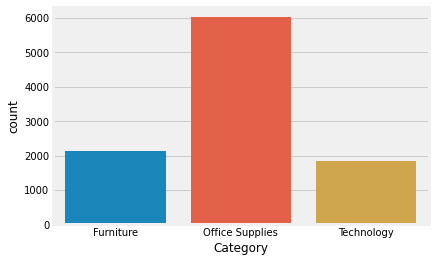

In [30]:
sns.countplot('Category',data=dataset)
plt.show()

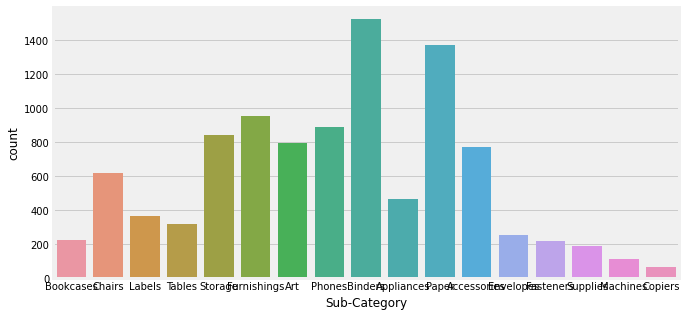

In [36]:
 #Countplot for the attribute 'Category'
plt.figure(figsize=(10,5))
sns.countplot('Sub-Category',data=dataset)
plt.show()

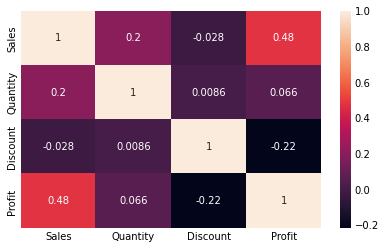

In [37]:
# Heatmap correlation matrix
data=['Sales','Quantity','Discount','Profit']
sns.heatmap(dataset[data].corr(),annot=True )
plt.show()

**From the heatmap we can infer that profit and sales have positive correlation whereas profit and discount are negatively correlated.**

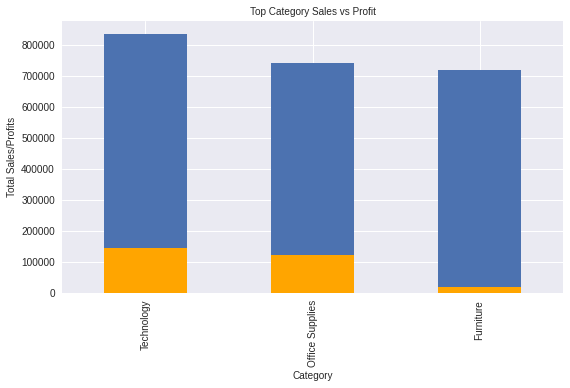

In [45]:
# computing top categories in terms of sales from first 150 observations
top_category_s = dataset.groupby("Category").Sales.sum().nlargest(n=150)
# computing top categories in terms of profit from first 150 observations
top_category_p = dataset.groupby("Category").Profit.sum().nlargest(n=150)

# plotting to see it visually
plt.style.use('seaborn')
top_category_s.plot(kind = 'bar',figsize = (8,5),fontsize = 10)
top_category_p.plot(kind = 'bar',figsize = (8,5),fontsize = 10,color='orange')
plt.xlabel('Category',fontsize = 10)
plt.ylabel('Total Sales/Profits',fontsize = 10)
plt.title("Top Category Sales vs Profit",fontsize = 10)
plt.show()

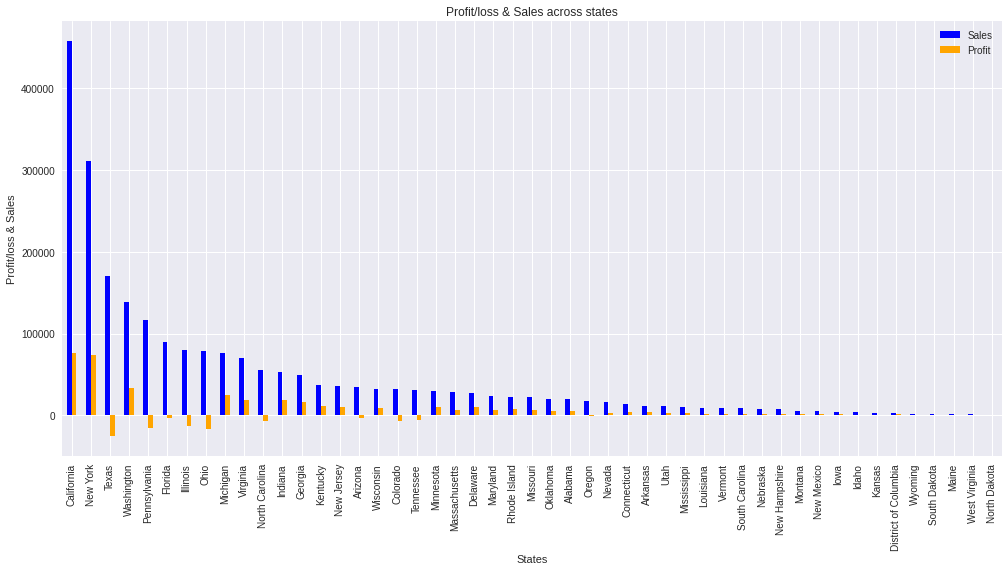

In [48]:
ps = dataset.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['blue','orange'],figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

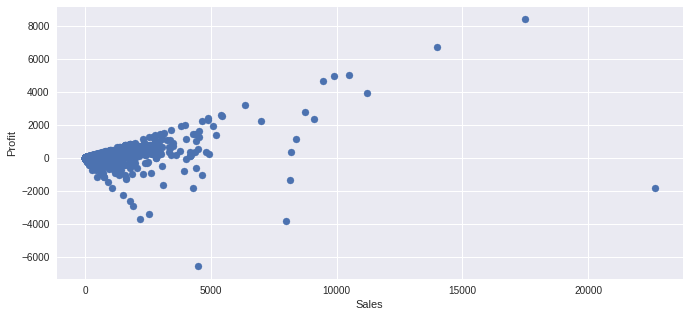

In [51]:
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(dataset['Sales'],dataset['Profit'])
ax.set_xlabel('Sales')
ax.set_ylabel('Profit')
plt.show()

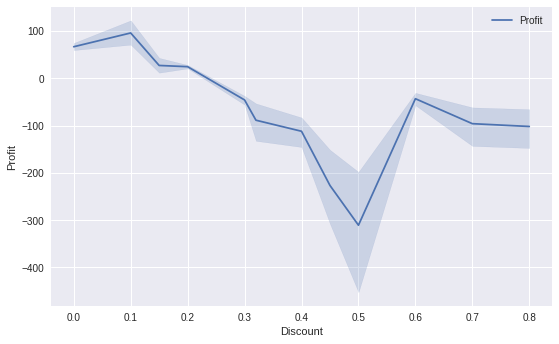

In [49]:
sns.lineplot(x='Discount',y='Profit',label='Profit',data=dataset)
plt.legend()
plt.show()
#profit vs discount

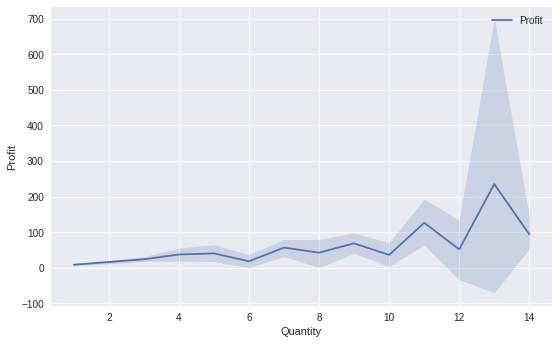

In [52]:
sns.lineplot(x='Quantity',y='Profit',label='Profit',data=dataset)
plt.legend()
plt.show()
#Profit vs quantity

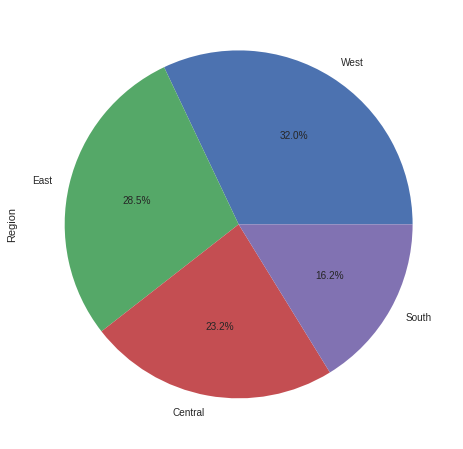

In [53]:
plt.figure(figsize=(10,8))
dataset['Region'].value_counts().plot.pie(autopct = '%1.1f%%')
plt.show()

 So,as a business manager, try to find out the weak areas where you can work to make more profit?
Technology and Office Supplies have high profit.

Furniture have less **profit**

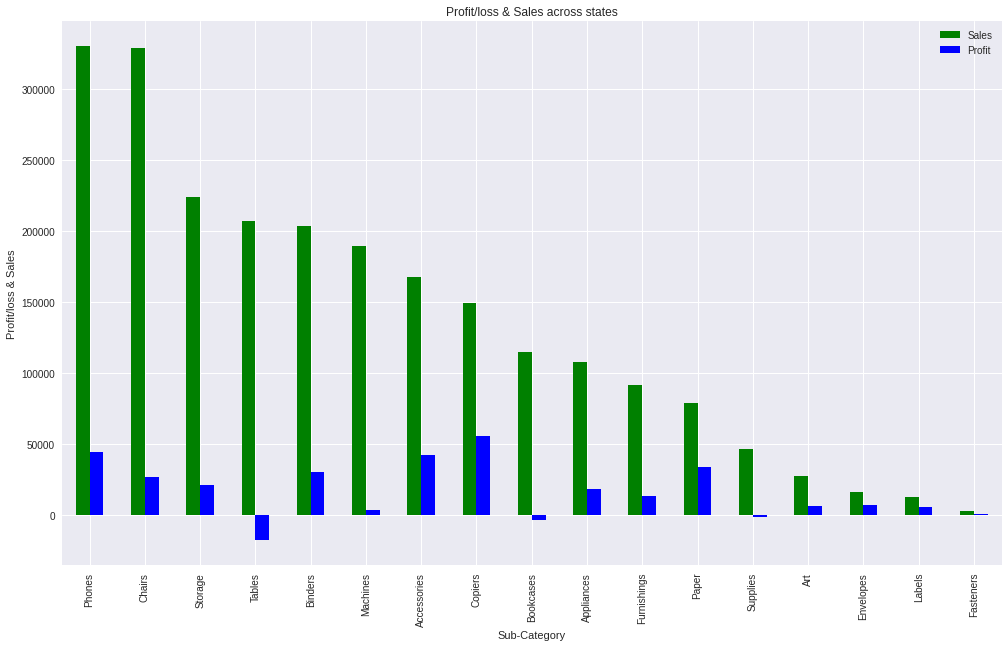

In [54]:
ps = dataset.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(color=['green','blue'],figsize=(15,10))
plt.title('Profit/loss & Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/loss & Sales')
plt.show()

**OBSERVATION**

*   Phones sub-category have high sales.
*   Chairs have high sales but less profit compared to phones.
*   Tables and Bookmarks sub-categories facing huge loss.

**Thank you**




